## Análisis Exploratorio de Datos

Este trabajo tiene como objetivo analizar y comprender el comportamiento del sector de telecomunicaciones en Argentina a nivel nacional. El cliente, una empresa enfocada principalmente en la provisión de servicios de internet, busca aumentar el acceso a este servicio en todo el país. No obstante, para garantizar que se proporcionen datos pertinentes y útiles para la toma de decisiones estratégicas, es fundamental considerar también los demás servicios de comunicación en el análisis.

En el presente documento, se detalla paso por paso los procedimientos realizados para llevar adelante el análisis requerido, el que se vale fundamentalmente de los datos públicos ofrecidos por el Ente Nacional de Comunicaciones (ENACOM).

En el *procedimiento de ETL* se ha realizado la carga y corrección de datos, revisando los formatos, los valores nulos y valores faltantes. También se ha realizado una limpieza de cadenas de texto, corregido los formatos erróneos, y **manejado los valores duplicados** Además, se ha hecho una inspección preliminar, para determinar qué datos podían ser de interés para este informe.

En esta nueva instancia, se procederá a un análisis de las tablas seleccionadas por su relevancia, el cual pretende ser mucho más profundo que el primero. En él se intentará identificar patrones, outliers, comportamientos de los datos y su implicancia en el sector de telecomunicaciones en Argentina.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accesos por Tecnología y por Localidad:
Comenzaremos por este dataset, que ofrece información sobre los accesos a distintas teconologías según las localidades.

In [4]:
df_accesos = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Accesos_tecnologia_localidad.csv')
df_accesos.head(3)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181


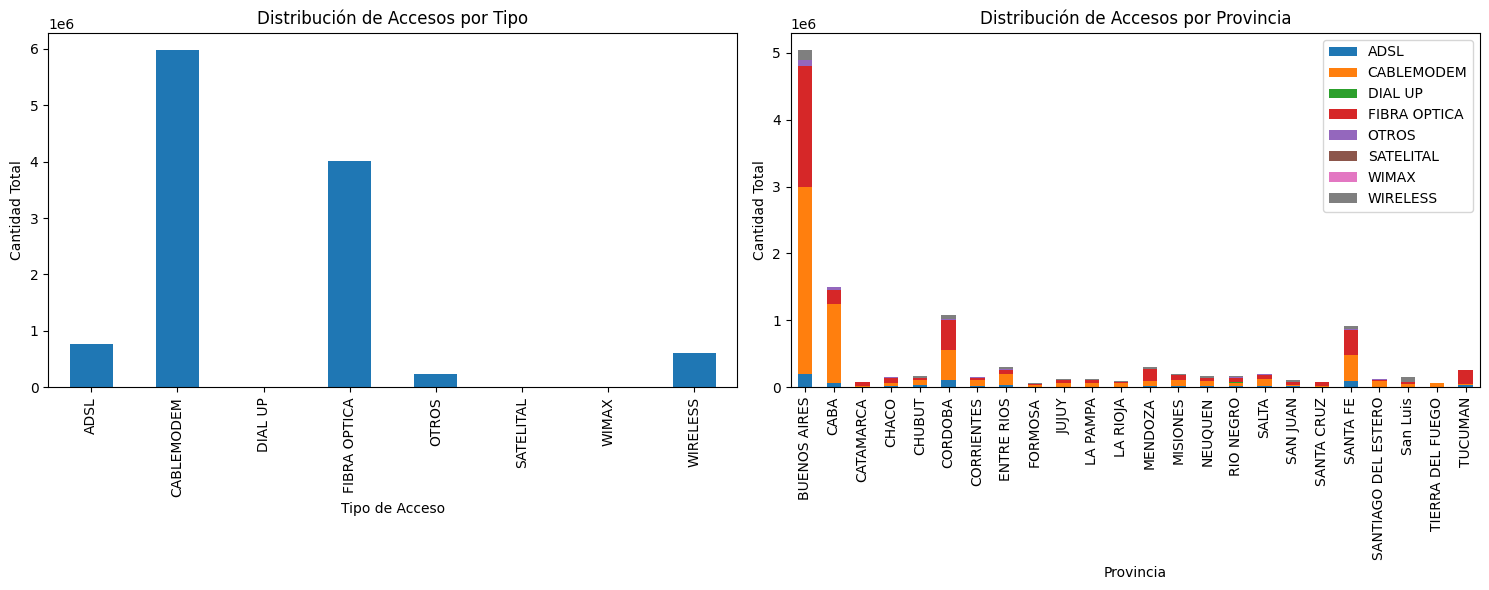

In [11]:
# Vamos a crear un gráfico combinado, para analizar en él la distribución de accesos por tipo, y por provincia.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

#En el primer gráfico se puede ver cuáles son los tipos de tecnología con más accesos
df_accesos[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Distribución de Accesos por Tipo')
axs[0].set_ylabel('Cantidad Total')
axs[0].set_xlabel('Tipo de Acceso')

# El segundo gráfico, que es de barras apiladas, nos permitirá observar la distribución por provincias.
df_accesos.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Distribución de Accesos por Provincia')
axs[1].set_ylabel('Cantidad Total')
axs[1].set_xlabel('Provincia')

plt.tight_layout() #Ajustamos el espacio
plt.show()


Podemos observar en el gráfico de la izquierda, que prevalecen las tecnologías de Cablemodem y Fibra Óptica.
A la derecha, tenemos la distribución por Provincias, y en las barras apiladas cada tipo de conexión. Podemos observar que la Provincia de Buenos Aires cuenta con una enorme preponderancia en cuanto a la cantidad de conexiones por sobre el resto de las Provincias, seguida por la Ciudad Autónoma de Buenos Aires (CABA) y la Provincia de Córdoba.
Este dataset no nos permite hacer un análisis de la evolución en el tiempo de los parámetros observados.

# Velocidad de Bajada

Podemos analizar ahora la evolución histórica de la velocidad de "bajada" o descarga (tasa a la cual los datos se transfieren desde un servidor en internet hacia un dispositivo). Se mide en Megabits por segundo.

In [13]:
df_vel_prov = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Velocidad % por prov.csv')
df_vel_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45


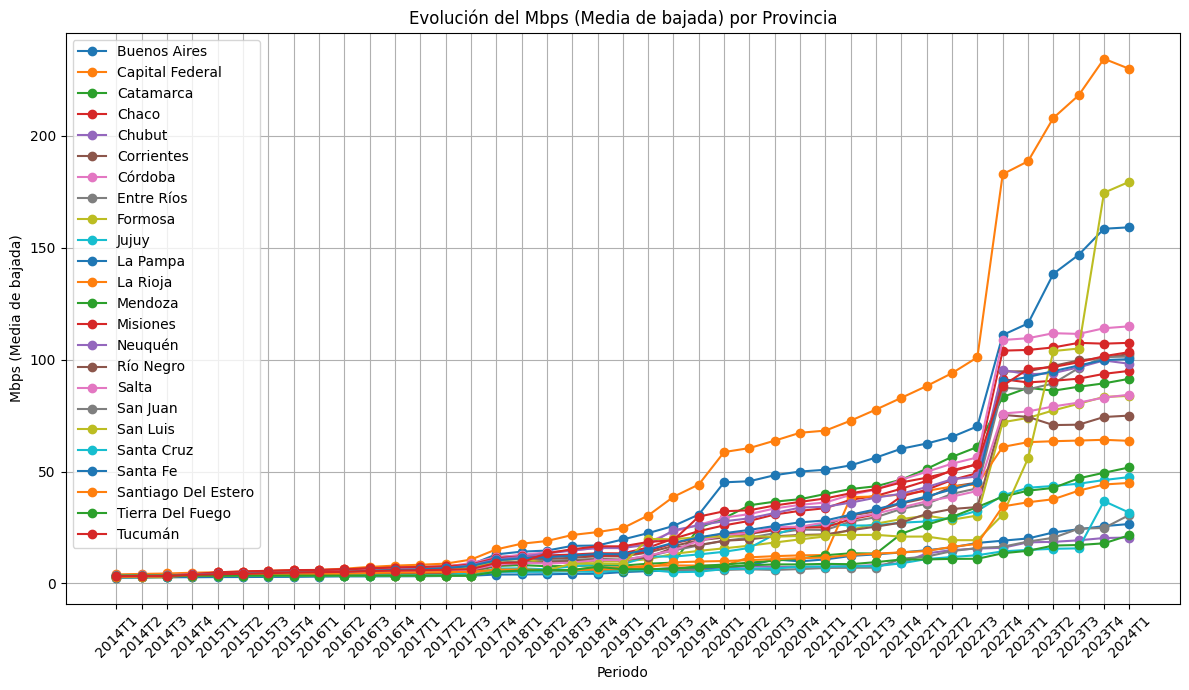

In [16]:
df_vel_prov['Periodo'] = df_vel_prov['Año'].astype(str) + 'T' + df_vel_prov['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico

df_pivot = df_vel_prov.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

plt.figure(figsize=(12, 7))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_vel_prov.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

En este primer análisis, sectorizado por Provincias, podemos ver que la velocidad media de descarga se destaca en la Ciudad Autónoma de Buenos Aires. Tiene mucho sentido: hablamos de una metrópolis, con gran densidad poblacional, en la que se suelen instalar grandes empresas multinacionales. En consecuencia, las inversiones en el rubro son mayores, aunque esto no es más que una especulación (en esta instancia) que podrá ser confirmada con mayores datos.
Lo que sí podemos concluir desde este primer grafo, es que en Provincias como Buenos Aires, de una enorme extensión territorial (y con menor densidad poblacional), se encuentran peor posicionadas en éstos términos.<br>
No obstante, se puede osbservar un enorme crecimiento en todas las provincias desde el 2017 a la actualidad, con un marcado ascenso a partir del año 2020, y un fuerte crecimiento desde la segunda mitad del año 2022.<br>
Para confimar estas tendencias, es procedente analizar la evolución total a nivel nacional.

In [19]:
df_vel_total = pd.read_csv(r'C:\Users\GASTON\Desktop\PI2\DATA\Totales VMD.csv')
df_vel_total.head(1)

,Año,Trimestre,Mbps (Media de bajada)
0,2024,1,139.15


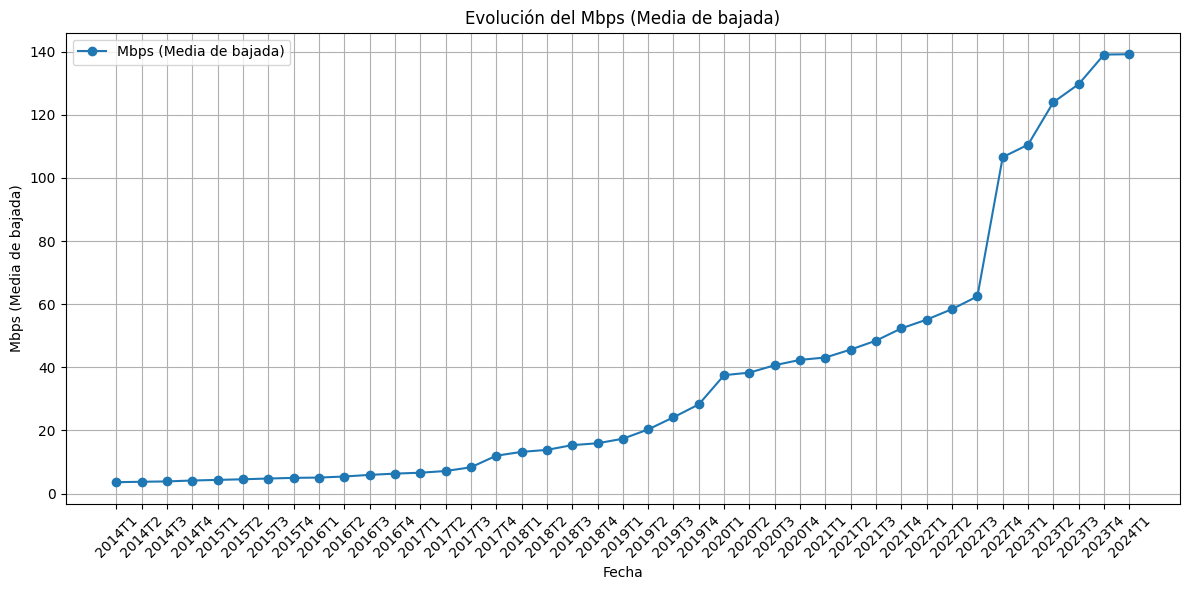

In [21]:
df_vel_total['Periodo'] = df_vel_total['Año'].astype(str) + 'T' + df_vel_total['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico
df_vel_total = df_vel_total.iloc[::-1] #invertimos el orden de los registros para acomodar el gráfico


plt.figure(figsize=(12, 6))
plt.plot(df_vel_total['Periodo'], df_vel_total['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución del Mbps (Media de bajada)')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_vel_total.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

Efectivamente, con esta nueva información podemos confirmar la tendencia a nivel nacional: el crecimiento de la velocidad de bajada es sostenido, casi sin la existencia de períodos en los que haya una baja en el promedio de velocidad de descarga. <br>
Luego, podemos observar períodos con una tendencia al crecimiento a mayor velocidad. Identificamos un primer pico en el primer trimestre del año 2020. Puede explicarse por motivos históricos: la pandemia global por Covid-19 trajo aparejado no sólo un mayor consumo, sino un despliegue de programas orientados al desarrollo de la conectividad, incentivos para el recambio y la actualización tecnológica; según informa el ENACOM en [este enlace](https://www.enacom.gob.ar/institucional/casi-un-millon-de-nuevas-familias-acceden-a-internet-con-una-velocidad-50--mas-rapida-que-al-inicio-de-la-pandemia_n3279).<br>
Este tipo de programas también explican un crecimiento excepcional de la velocidad durante el tercer trimestre del año 2022, lo que también surge a partir de la consolidación de trabajos remotos, lo que implicó mejorar las conexiones para poder desempeñarse. El trabajo remoto [se ha consolidado exitosamente en Argentina](https://utopiaurbana.city/2023/11/22/el-regreso-a-la-oficina-o-la-consolidacion-del-trabajo-remoto/#:~:text=En%20Argentina%20el%20fen%C3%B3meno%20tambi%C3%A9n,trabajo%20remoto%20durante%20la%20pandemia.).